# olympics data analysis

dataset: https://www.kaggle.com/code/devisangeetha/explore-olympic-medals/input

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
data= pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


joining the dataframe

In [5]:
data= data.merge(region , how= 'left', on ='NOC')

In [6]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
data.shape

(271116, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


checking the null value

In [10]:
null =data.isnull().sum()

print the columns names containing the null values in the form of list

In [11]:
null_columns = data.columns[data.isnull().any()].tolist()

In [12]:
null_columns

['Age', 'Height', 'Weight', 'Medal', 'region', 'notes']

Athletes from India

In [13]:
data.query('Team =="India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


Athletes from japan

In [14]:
data.query('Team =="Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


# top 10 countries participating in olympics 


In [15]:
top10 = data['Team'].value_counts().sort_values(ascending= False).head(10)
top10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<Axes: >

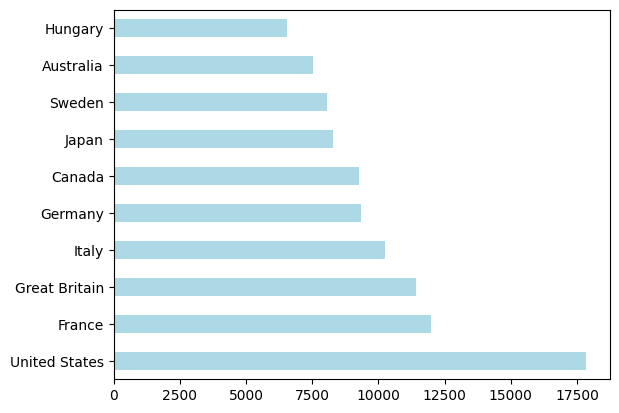

In [16]:
top10.plot(kind='barh', color= "lightblue")

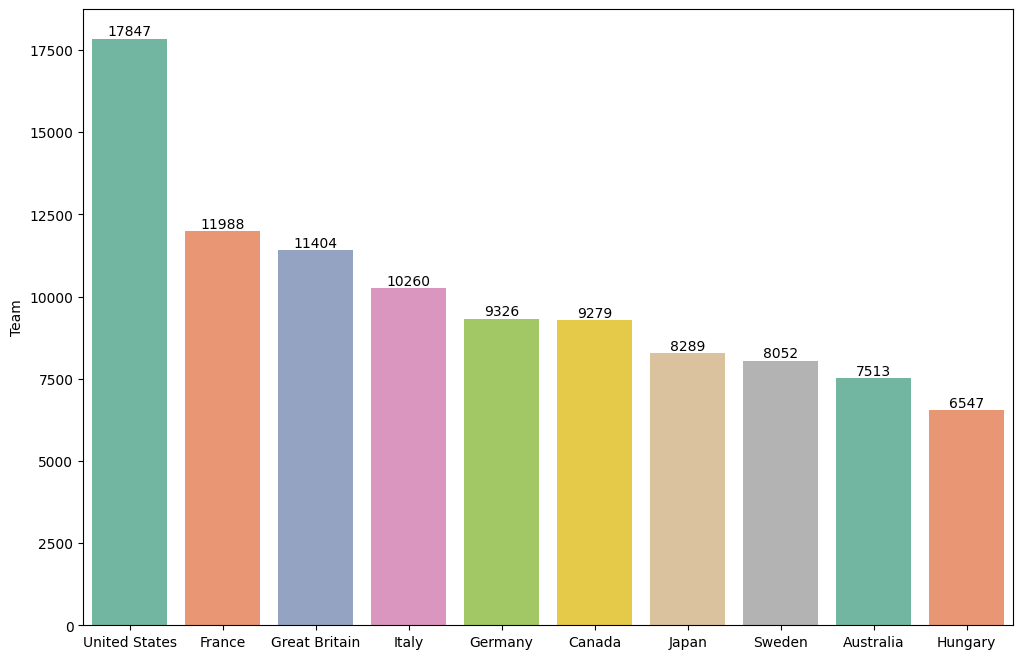

In [17]:
plt.figure(figsize =(12,8))
ax = sns.barplot(x= top10.index, y= top10, palette ='Set2')
for bars in ax.containers:
    ax.bar_label(bars)

# age distribution of the participants 

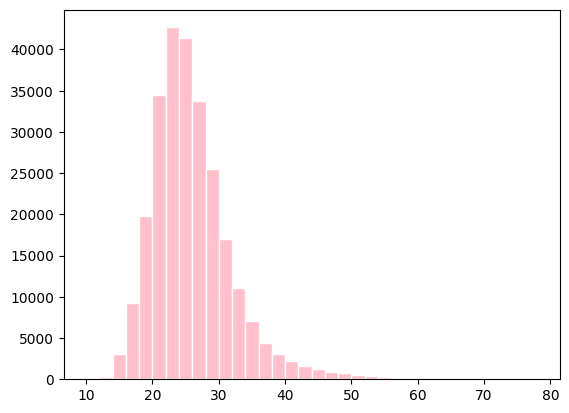

In [18]:
plt.hist(x=data['Age'], bins=np.arange(10,80,2), color= 'pink', edgecolor= 'white')
plt.show()

as we can see from the graph that most of the people from age group 20 to 35 are participating in olympics

# sports held at winter olympics 

In [19]:
winter_sports = data[data['Season'] =='Winter'].Sport.unique().tolist()
winter_sports

['Speed Skating',
 'Cross Country Skiing',
 'Ice Hockey',
 'Biathlon',
 'Alpine Skiing',
 'Luge',
 'Bobsleigh',
 'Figure Skating',
 'Nordic Combined',
 'Freestyle Skiing',
 'Ski Jumping',
 'Curling',
 'Snowboarding',
 'Short Track Speed Skating',
 'Skeleton',
 'Military Ski Patrol',
 'Alpinism']

# sports held at summer olympics

In [20]:
summer_sports = data[data['Season'] =='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

# male and female participation in olympics 

In [21]:
data['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

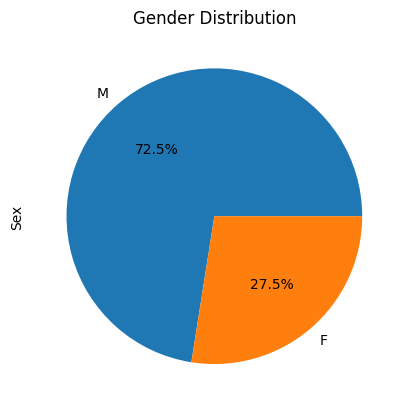

In [22]:
plt.title('Gender Distribution')
data['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.show()

# find the total of medals the athletes have won

In [23]:
data['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

<Axes: ylabel='Medal'>

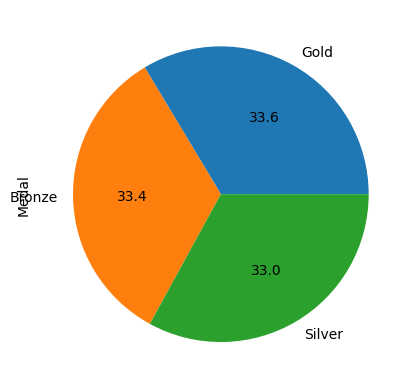

In [24]:
data['Medal'].value_counts().plot(kind='pie', autopct='%0.1f')

# Total female athelets in each olympics 

In [25]:
female = data[(data['Sex']=='F') & (data['Season']=='Summer')][['Sex', 'Year']]
female =female.groupby('Year').count().reset_index().head(10)
female

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [26]:
female =data[(data['Sex']=='F') & (data['Season']=='Summer')] 

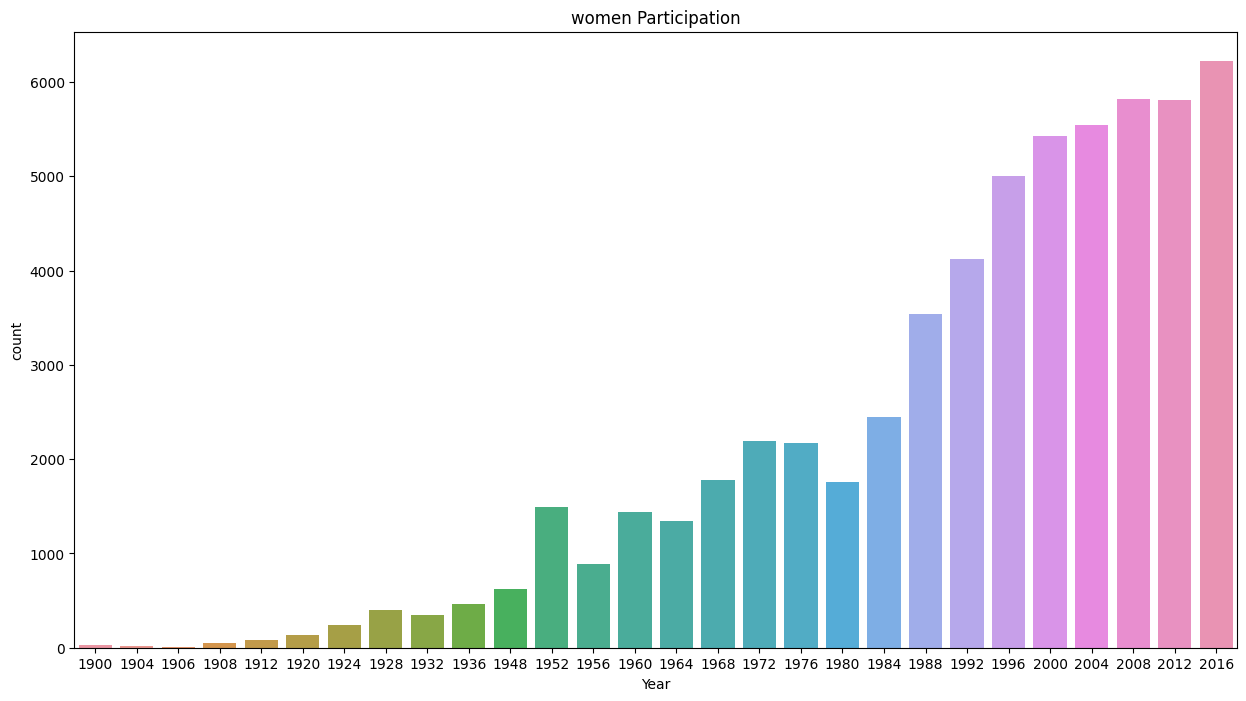

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='Year', data= female)
plt.title('women Participation')
plt.show()

In [28]:
# gold medal athletes

In [29]:
gold_medal = data[data['Medal']=='Gold']
gold_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


# gold beyond 60

In [30]:
gold_medal['ID'][gold_medal['Age']>60].count()

6

# in which sport 60+ age group people have won the gold medal

In [31]:
sport = gold_medal['Sport'][gold_medal['Age']>60]
sport

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

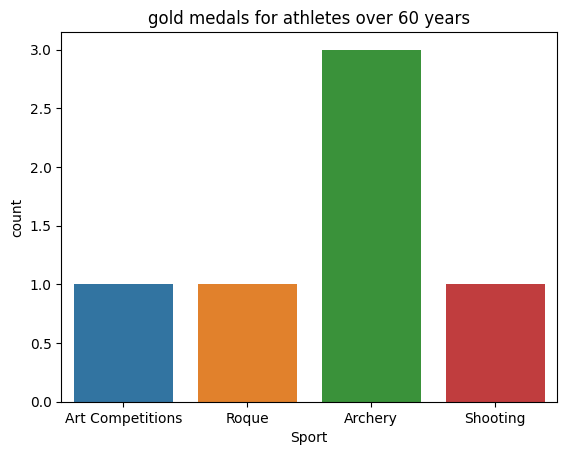

In [32]:
ax = sns.countplot(data= sport, x= sport)
plt.title('gold medals for athletes over 60 years')
plt.show()

# gold medals from each country 

In [33]:
gold_medal['region'].value_counts().head(5)

USA        2638
Russia     1599
Germany    1301
UK          678
Italy       575
Name: region, dtype: int64

<Axes: xlabel='countries', ylabel='No of medals'>

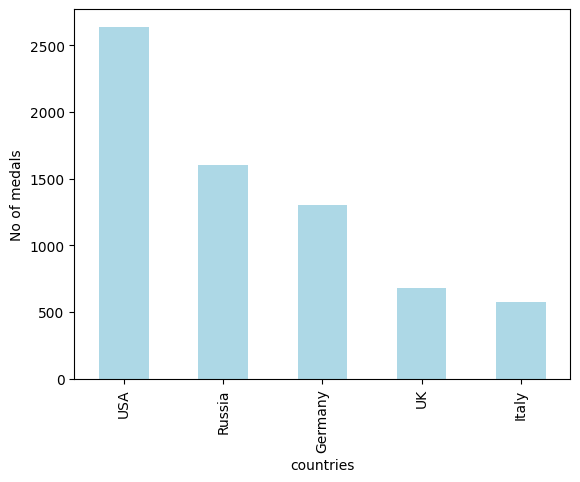

In [34]:
gold_medal['region'].value_counts().head(5).plot(kind ='bar', color= 'lightblue', xlabel='countries',ylabel='No of medals')

# Scatterplot for men and women who who have won a medal

In [35]:
not_null_medal= data[(data['Height'].notnull()) & (data['Weight'].notnull())]

<Axes: xlabel='Height', ylabel='Weight'>

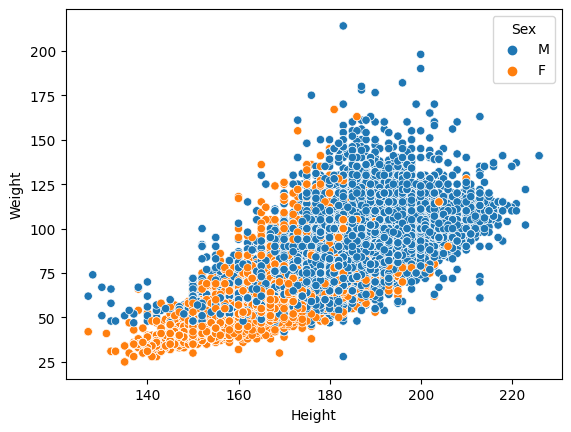

In [36]:
sns.scatterplot(x=data['Height'], y=data['Weight'], data=not_null_medal, hue='Sex')